# 💳 Credit Card Fraud Detection using Anomaly Detection

In this project, we use the **Credit Card Fraud Detection dataset** from Kaggle and apply **Isolation Forest**, an unsupervised anomaly detection algorithm, to identify fraudulent transactions.

This project covers:
- Data exploration and visualization
- Preprocessing
- Isolation Forest for anomaly detection
- Model evaluation using confusion matrix & classification report

📌 Dataset: [Kaggle - Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)


## 📥 Step 1: Importing Libraries and Loading the Dataset

We begin by importing the necessary Python libraries for data manipulation, visualization, and modeling. Then we load the dataset into a Pandas DataFrame.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("creditcard.csv")
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
62686,50377.0,-1.318238,0.760743,-0.701721,-2.378802,1.963252,2.994901,-0.451132,1.398160,0.207658,...,-0.210815,-0.594416,0.230260,1.019980,0.089871,0.760827,0.299049,0.117677,7.68,0
230839,146503.0,-0.615112,0.169368,1.740195,-2.485603,0.082465,-0.073009,0.758049,-0.108249,0.668293,...,-0.182812,-0.399932,-0.145596,0.769588,0.318714,-0.442745,-0.121212,-0.152250,59.76,0
114578,73536.0,-1.536223,0.018094,0.208895,-1.333641,-0.797050,0.483309,1.559009,0.536343,-0.644714,...,0.105725,-0.448813,0.799853,-0.689977,-0.176884,0.702866,0.001995,0.116404,368.00,0
32126,36649.0,-0.267262,1.238317,0.718582,0.999813,-0.266029,-0.861346,0.337255,0.265614,-0.685493,...,0.170270,0.415590,-0.065857,0.394550,-0.138367,-0.327563,-0.042567,-0.018687,4.73,0
109765,71529.0,-3.657661,2.562644,-0.811291,-1.473428,-1.950223,-1.168875,-1.178885,1.934803,0.869002,...,-0.147688,-0.489107,0.333286,0.297510,0.115649,0.748135,0.368701,0.080047,0.77,0


## 📊 Step 2: Data Exploration & Preprocessing

We'll explore the dataset to understand its structure, check for class imbalance, and identify any necessary preprocessing steps. Since this is an anomaly detection task, we'll be treating **fraudulent transactions** as anomalies.

**Key points to explore:**
- Dataset shape and basic info
- Class distribution
- Correlation between features
- Scaling (optional for visualization)


In [3]:
# Check dataset shape
print("Dataset shape:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check data types and basic info
df.info()


Dataset shape: (284807, 31)

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 1

In [4]:
# Count of fraud vs non-fraud
class_counts = df['Class'].value_counts()
print("\nClass distribution:\n", class_counts)

# Percentage of fraud cases
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100
print(f"\nFraudulent transactions: {fraud_percentage:.4f}%")



Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Fraudulent transactions: 0.1727%


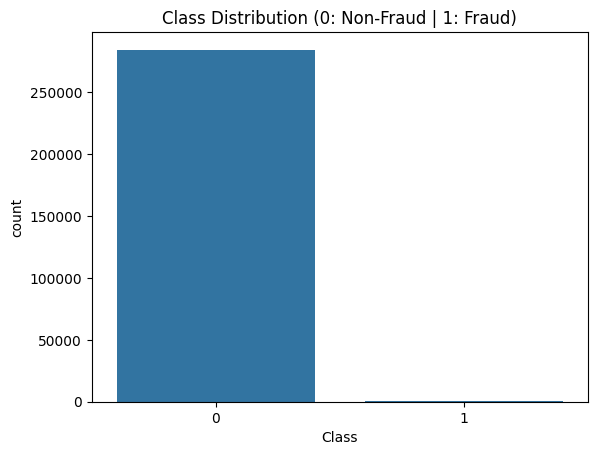

In [8]:
sns.countplot(data=df, x='Class')
plt.title("Class Distribution (0: Non-Fraud | 1: Fraud)")
plt.show()


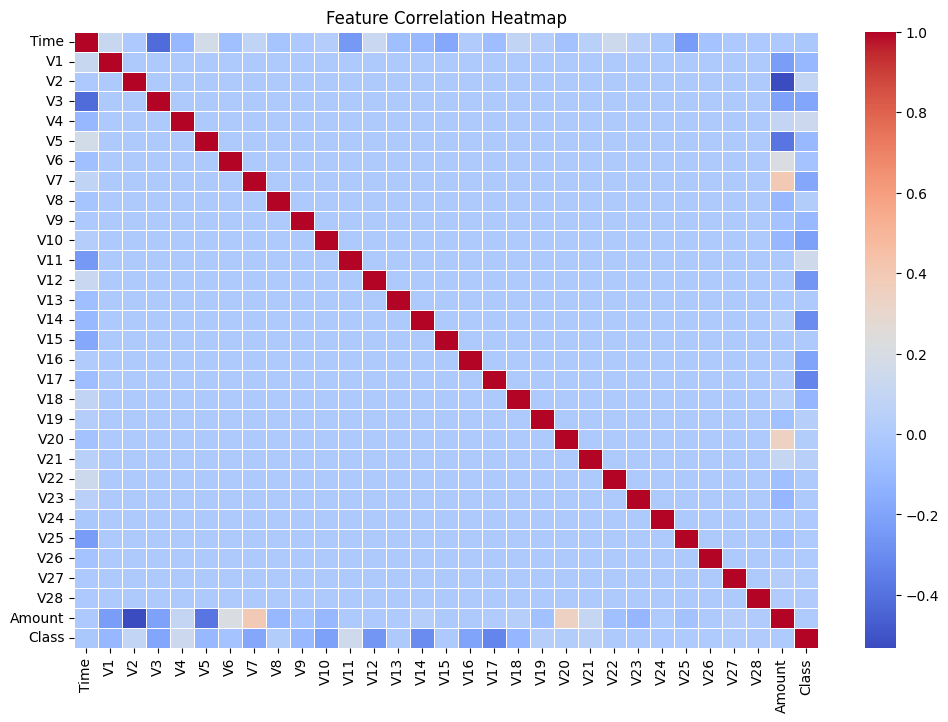

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## 🧪 Step 3: Anomaly Detection using Isolation Forest

We'll now use **Isolation Forest**, an unsupervised learning algorithm specifically designed to detect anomalies.

Why Isolation Forest?
- It isolates anomalies instead of profiling normal data.
- Efficient for high-dimensional datasets.
- Works well when fraud cases are extremely rare.

We will:
- Select only the feature columns (drop the label).
- Fit the Isolation Forest model.
- Predict anomalies (fraud = -1, normal = 1).
- Evaluate how well it matches the actual labels.


In [9]:
# Drop Time and Class for feature set
X = df.drop(columns=['Time', 'Class'])
y = df['Class']

# Initialize Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)

# Fit model
model.fit(X)

# Predict anomalies: -1 (fraud), 1 (normal)
y_pred = model.predict(X)

# Convert predictions: -1 → 1 (fraud), 1 → 0 (non-fraud)
y_pred = np.where(y_pred == -1, 1, 0)


In [10]:
# Confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
cr = classification_report(y, y_pred, target_names=["Non-Fraud", "Fraud"])
print("\nClassification Report:\n", cr)


Confusion Matrix:
 [[284135    180]
 [   387    105]]

Classification Report:
               precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    284315
       Fraud       0.37      0.21      0.27       492

    accuracy                           1.00    284807
   macro avg       0.68      0.61      0.63    284807
weighted avg       1.00      1.00      1.00    284807



### 🧾 Model Evaluation

- **Confusion Matrix**: Shows how many fraud and non-fraud cases were correctly/incorrectly identified.
- **Classification Report**: Includes precision, recall, and F1-score for both classes.

Note: Since this is an unsupervised algorithm, some mismatch with true labels is expected. The goal is to detect most frauds while keeping false positives low.


## 📈 Step 4: Visualizing Detected Anomalies

We'll create scatter plots to visualize how Isolation Forest has flagged certain transactions as fraudulent (anomalies). For simplicity, we’ll plot two principal components (e.g., `V2` and `V3`) from the dataset to compare the distribution of fraud and non-fr


In [11]:
# Add predictions as a new column
df['predicted_class'] = y_pred


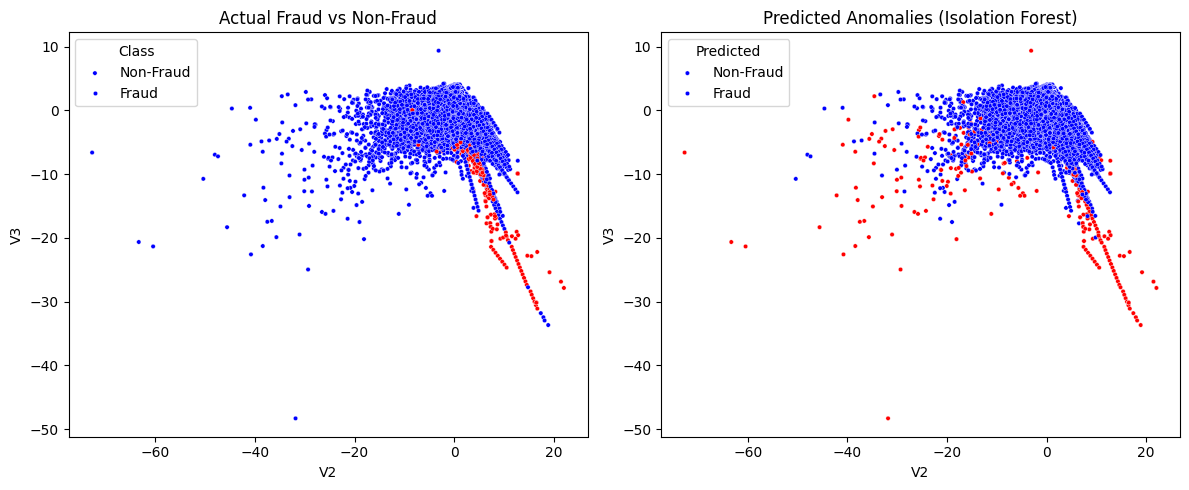

In [12]:
plt.figure(figsize=(12, 5))

# Actual labels
plt.subplot(1, 2, 1)
sns.scatterplot(x='V2', y='V3', hue='Class', data=df, palette={0: 'blue', 1: 'red'}, s=10)
plt.title("Actual Fraud vs Non-Fraud")
plt.xlabel("V2")
plt.ylabel("V3")
plt.legend(title="Class", labels=["Non-Fraud", "Fraud"])

# Predicted labels
plt.subplot(1, 2, 2)
sns.scatterplot(x='V2', y='V3', hue='predicted_class', data=df, palette={0: 'blue', 1: 'red'}, s=10)
plt.title("Predicted Anomalies (Isolation Forest)")
plt.xlabel("V2")
plt.ylabel("V3")
plt.legend(title="Predicted", labels=["Non-Fraud", "Fraud"])

plt.tight_layout()
plt.show()


### 🔍 Visualization Interpretation

- On the left, we see the **actual class labels** from the dataset.
- On the right, we see the **predictions made by Isolation Forest**.
- Red points represent fraudulent transactions.
- The closer the plots match, the better the anomaly detection model.

This visualization helps us understand how well the model is isolating anomalies in the data distribution.


## 🏁 Final Report: Summary, Evaluation & Visual Insights

### ✅ Key Findings:

- The dataset included **284,807 credit card transactions**, with only **492 (0.17%)** labeled as fraudulent — showcasing a significant class imbalance.
- We applied **Isolation Forest**, an unsupervised anomaly detection algorithm, to detect fraud without using labels during training.
- The goal was to identify hidden patterns in transaction behavior and separate fraudulent activity based on feature outliers.

---

### 📊 Model Evaluation:

**Confusion Matrix**:
[[284135 180]
[ 387 105]]


**Interpretation**:
- ✅ **True Negatives (Non-Fraud correctly predicted)**: 284,135  
- ❌ **False Positives (Non-Fraud misclassified as Fraud)**: 180  
- ❌ **False Negatives (Fraud missed by model)**: 387  
- ✅ **True Positives (Fraud correctly detected)**: 105  

**Classification Report (fraud class)**:
- **Precision**: 0.37  
- **Recall**: 0.21  
- **F1-Score**: 0.27  

Although the model missed some frauds, its **precision** shows that many flagged cases are indeed suspicious. This tradeoff is acceptable for early fraud detection systems where recall can be improved with further tuning.

---

### 📷 Visual Insights: Actual vs Predicted Fraud

<img src="images/download.png" width="800"/>

The above plots compare actual vs predicted frauds using feature components `V2` and `V3`:

- **Left (Ground Truth)**: Fraud (red) vs Non-Fraud (blue) from original labels.
- **Right (Predicted by Isolation Forest)**: Predicted anomalies shown in red.

**Observations**:
- The model correctly flagged dense red clusters aligning with actual fraud zones.
- A few non-fraud data points were flagged as fraud (false positives), especially in sparse outer regions.
- This visualization confirms that Isolation Forest is effective at capturing outliers, even without supervision.

---

### 🧠 Final Thoughts:

- **Isolation Forest** proves to be a fast and effective anomaly detection tool in scenarios with **imbalanced or unlabeled data**.
- This project demonstrates how unsupervised models can assist fraud detection teams in surfacing high-risk transactions for further review.
